# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

# Load the diabetes dataset from CSV file

In [2]:
diabetes = pd.read_csv("diabetes.csv")

# Separating the features and the target variable

In [3]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Splitting the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Scaling the features

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the SVM model with linear kernel

In [6]:
svm_linear = svm.SVC(kernel="linear")

# Fitting the model on the training set

In [7]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

# Predicting on the test set

In [8]:
y_pred = svm_linear.predict(X_test)

# Printing the coefficients and the intercept

In [9]:
print("Coefficients: \n", svm_linear.coef_)
print("Intercept: \n", svm_linear.intercept_)

Coefficients: 
 [[ 2.28171782e-01  9.08087719e-01 -2.32998030e-01  5.45637894e-04
  -6.52910666e-02  5.45755568e-01  1.88338205e-01  1.77279673e-01]]
Intercept: 
 [-0.67573023]


# Printing the mean squared error and the coefficient of determination

In [10]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.18
Coefficient of determination: 0.17


# Plotting the actual and predicted outcomes

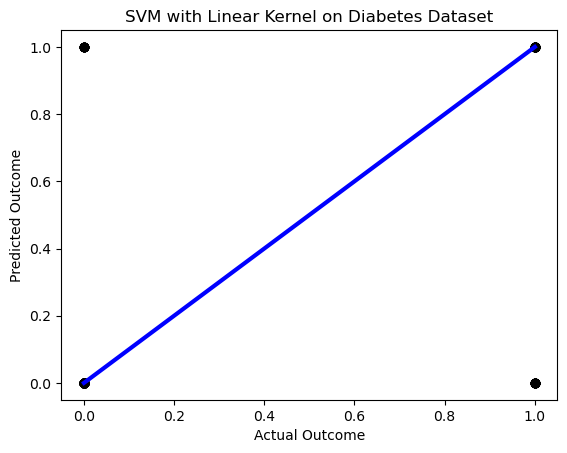

In [11]:
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Printing the confusion matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[98  9]
 [18 29]]


# Plotting the confusion matrix

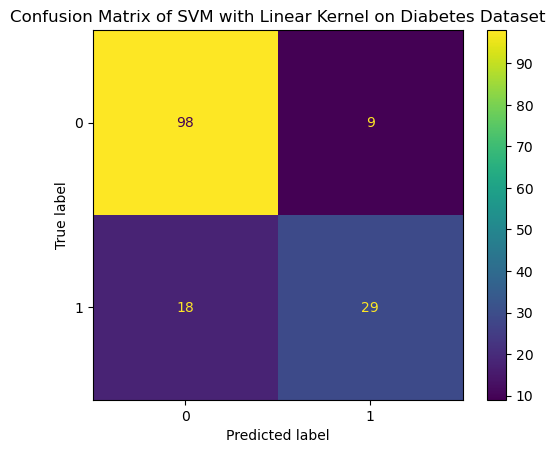

In [13]:
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Calculating and printing the ROC AUC

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)

ROC AUC: 0.77


# Plotting the ROC curve

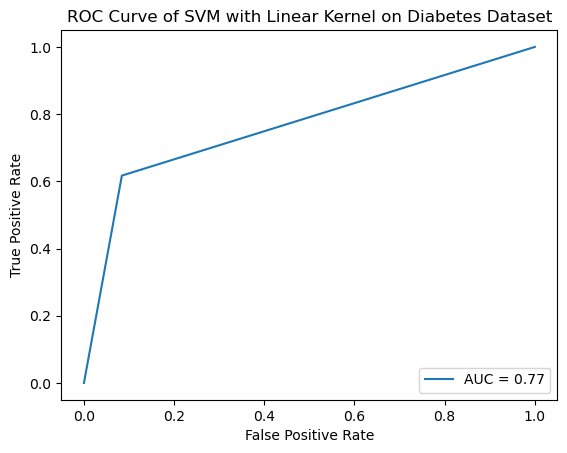

In [15]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Creating the SVM model with radial basis function kernel

In [16]:
svm_rbf = svm.SVC(kernel="rbf")

# Fitting the model on the training set

In [17]:
svm_rbf.fit(X_train, y_train)

SVC()

# Predicting on the test set

In [18]:
y_pred = svm_rbf.predict(X_test)

# Printing the mean squared error and the coefficient of determination

In [19]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.21
Coefficient of determination: 0.02


# Plotting the actual and predicted outcomes

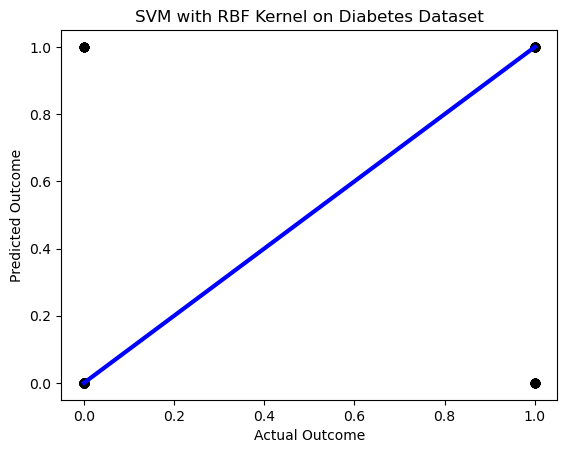

In [20]:
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# Printing the confusion matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[96 11]
 [21 26]]


# Plotting the confusion matrix

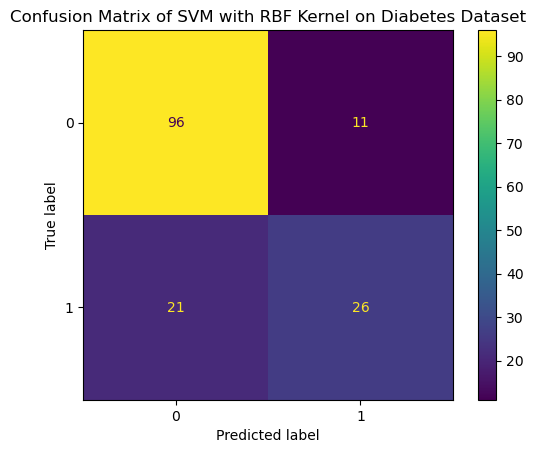

In [22]:
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# Calculating and printing the ROC AUC

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)

ROC AUC: 0.73


# Plotting the ROC curve

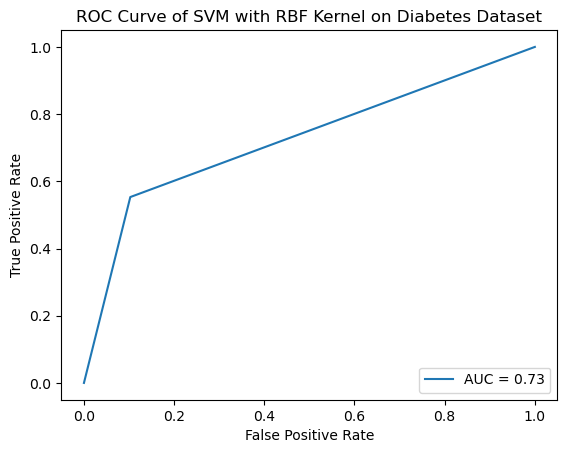

In [24]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# Selecting two features for visualization

In [25]:
X_vis = X[["BMI", "Glucose"]].values

# Scaling the features

In [26]:
X_vis = scaler.fit_transform(X_vis)

# Fitting the SVM model with linear kernel on the two features

In [27]:
svm_linear.fit(X_vis, y)

SVC(kernel='linear')

# Plotting the decision regions

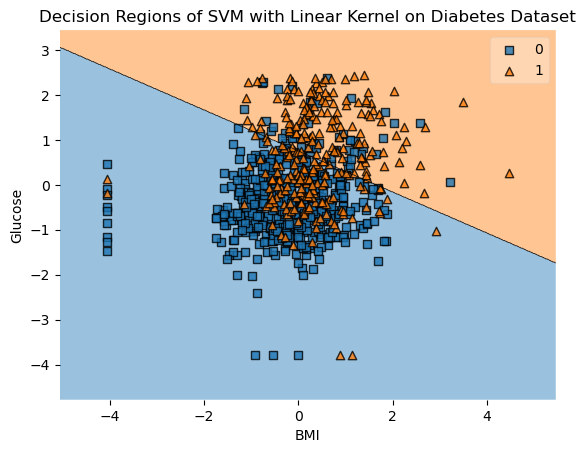

In [28]:
plot_decision_regions(X=X_vis, y=y.values, clf=svm_linear)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Fitting the SVM model with RBF kernel on the two features

In [29]:
svm_rbf.fit(X_vis, y)

SVC()

# Plotting the decision regions

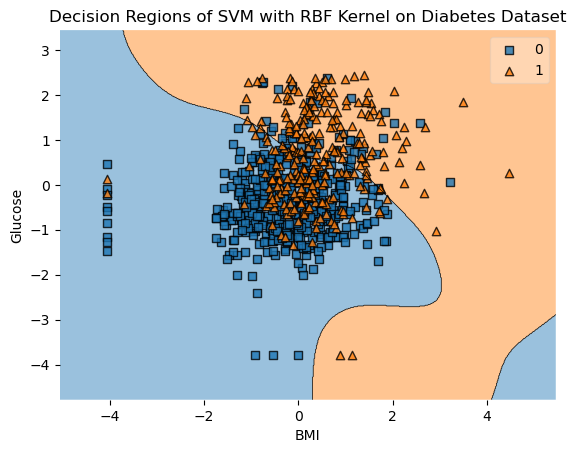

In [30]:
plot_decision_regions(X=X_vis, y=y.values, clf=svm_rbf)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of SVM with RBF Kernel on Diabetes Dataset")
plt.show()